# 1 Dependencies import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scripts.quickml.reader import read_csv
from scripts.quickml.plot import dataframe_distribution_overview, feature_filling, feature_distribution_univar, feature_trend_bivar, feature_distribution_bivar
from scripts.quickml.compare import index_lth
from scripts.utils import fill_infos

# pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

np.random.seed(294697)

***
# 2 Data import

For performance reasons, i choose to write a function that allow me to "chunk" the dataset and only take a percentage. I use a method for taking randomly the rows in each chunk, the result is that the output dataset have the same shape than if it was the original one.

In [2]:
original_dataset = read_csv(pd, np, "./datas/en.openfoodfacts.org.products.csv", 5, delimiter="\t", chunk_size=10000, nrows=10000)

/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (0,13,27,28,29,31,52) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [3]:
rows_nb, cols_nb = original_dataset.shape
original_dataset.shape

(500, 186)

In [4]:
original_dataset.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
4211,9542031503,http://world-en.openfoodfacts.org/product/0009...,org-database-usda,1587642335,2020-04-23T11:45:35Z,1587642335,2020-04-23T11:45:35Z,White chocolate truffles,NaN,NaN,...,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2431,0002986001002,http://world-en.openfoodfacts.org/product/0002...,kiliweb,1622336281,2021-05-30T00:58:01Z,1622336283,2021-05-30T00:58:03Z,shake on barbeque seasoning,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3558,0008577001635,http://world-en.openfoodfacts.org/product/0008...,usda-ndb-import,1489076889,2017-03-09T16:28:09Z,1587588622,2020-04-22T20:50:22Z,"Butternut mountain farm, barbeque sauce, maple",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,0000000058292,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055650,2017-03-09T10:34:10Z,1545997313,2018-12-28T11:41:53Z,Organic White Basmati Rice,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9544,11110853813,http://world-en.openfoodfacts.org/product/0011...,openfoodfacts-contributors,1590022881,2020-05-21T01:01:21Z,1590022971,2020-05-21T01:02:51Z,chicken,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data = original_dataset.copy()

***
# 3 Cleaning

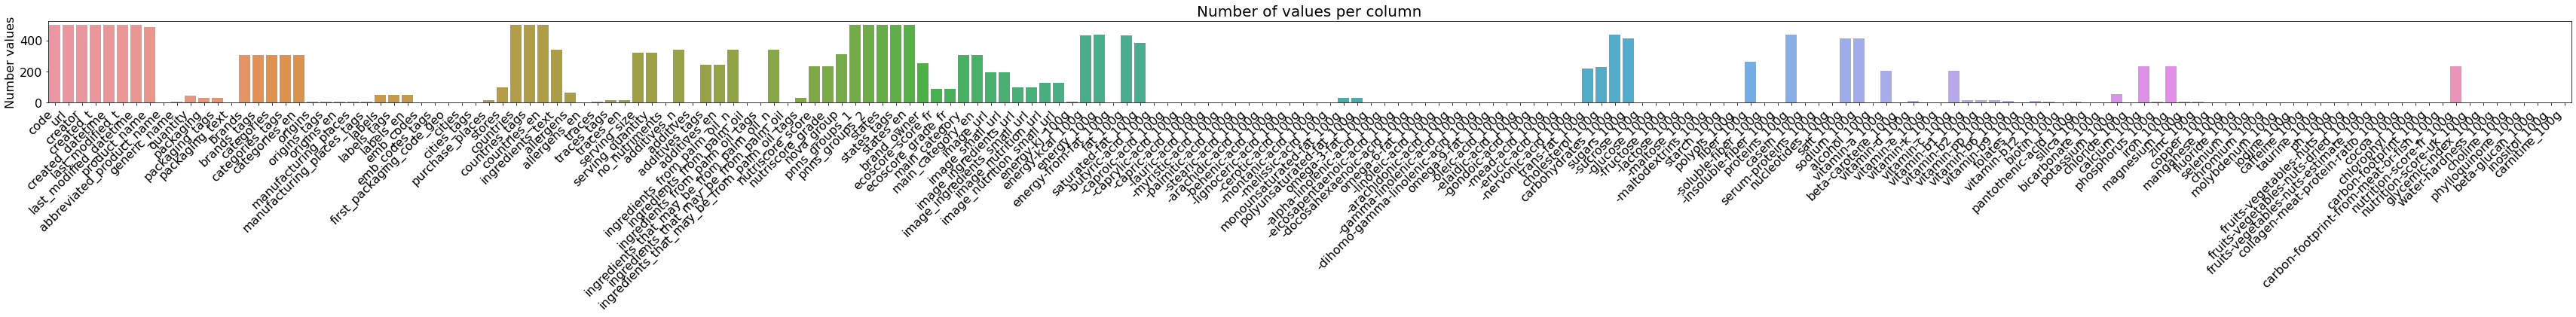

In [6]:
dataframe_distribution_overview(data, figsize=(60, 2))

### Shape comparison with original dataset

Original dataset  
![dataset_100_percent](images/global_overview_100p.png)

In [7]:
features = []

***
## 3.1 General informations group

### 3.1.1 Overview

In [126]:
general_infos_features = data.loc[:, "code":"quantity"].columns
general_infos_features

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'abbreviated_product_name', 'generic_name', 'quantity'],
      dtype='object')

In [127]:
general_infos = data.loc[:, general_infos_features]

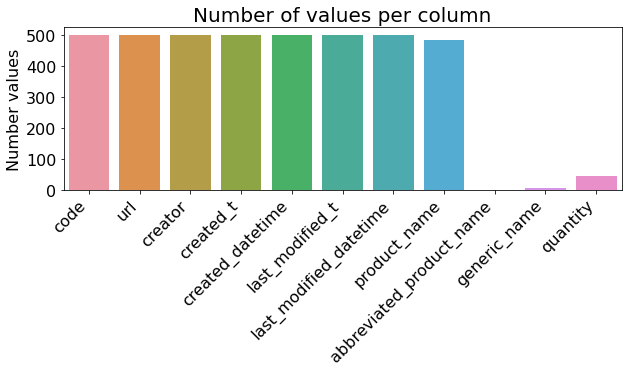

In [10]:
dataframe_distribution_overview(general_infos)

In [11]:
general_infos.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity
4211,9542031503,http://world-en.openfoodfacts.org/product/0009...,org-database-usda,1587642335,2020-04-23T11:45:35Z,1587642335,2020-04-23T11:45:35Z,White chocolate truffles,NaN,NaN,NaN
2431,0002986001002,http://world-en.openfoodfacts.org/product/0002...,kiliweb,1622336281,2021-05-30T00:58:01Z,1622336283,2021-05-30T00:58:03Z,shake on barbeque seasoning,NaN,NaN,NaN
3558,0008577001635,http://world-en.openfoodfacts.org/product/0008...,usda-ndb-import,1489076889,2017-03-09T16:28:09Z,1587588622,2020-04-22T20:50:22Z,"Butternut mountain farm, barbeque sauce, maple",NaN,NaN,NaN
307,0000000058292,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055650,2017-03-09T10:34:10Z,1545997313,2018-12-28T11:41:53Z,Organic White Basmati Rice,NaN,NaN,NaN
9544,11110853813,http://world-en.openfoodfacts.org/product/0011...,openfoodfacts-contributors,1590022881,2020-05-21T01:01:21Z,1590022971,2020-05-21T01:02:51Z,chicken,NaN,NaN,NaN


In [12]:
general_infos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 4211 to 3806
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   code                      500 non-null    object 
 1   url                       500 non-null    object 
 2   creator                   500 non-null    object 
 3   created_t                 500 non-null    int64  
 4   created_datetime          500 non-null    object 
 5   last_modified_t           500 non-null    int64  
 6   last_modified_datetime    500 non-null    object 
 7   product_name              485 non-null    object 
 8   abbreviated_product_name  0 non-null      float64
 9   generic_name              9 non-null      object 
 10  quantity                  47 non-null     object 
dtypes: float64(1), int64(2), object(8)
memory usage: 46.9+ KB


***
### 3.1.2 Usability

#### 3.1.2.1 Usability: Quantity

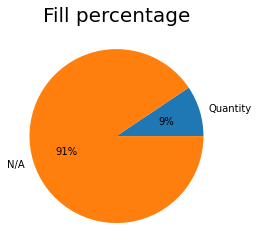

In [13]:
feature_filling(general_infos, "quantity", "Quantity")

In [14]:
general_infos[general_infos.quantity.notna()].quantity.head(10)

942           1 kg
7621    32 fl. oz.
971           2 kg
3532          30 g
3596         600 g
2921         16 oz
1985     2 x 115 g
3112          335g
2453         340 g
5045       6.25 oz
Name: quantity, dtype: object

The feature "quantity" is highly non homogeneous and will be very difficult to use. We will not keep it.

In [15]:
general_infos.drop(columns=["quantity"], inplace=True)

#### 3.1.2.2 Usability: abbreviated_product_name

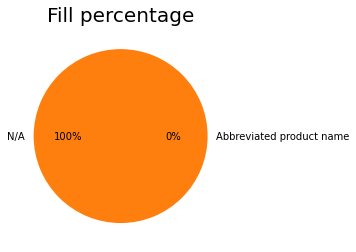

In [128]:
feature_filling(general_infos, "abbreviated_product_name", "Abbreviated product name")

In [133]:
general_infos[general_infos["abbreviated_product_name"].notna()].loc[:, ["abbreviated_product_name"]].head()

,abbreviated_product_name


The fill percentage of 'abbreviated_product_name" is very low, we can rid of it.

In [18]:
general_infos.drop(columns=["abbreviated_product_name"], inplace=True)

#### 3.1.2.3 Usability: generic_name

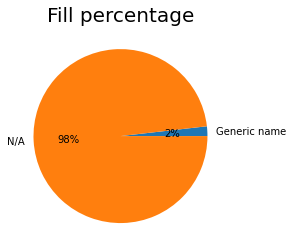

In [129]:
feature_filling(general_infos, "generic_name", "Generic name")

In [131]:
general_infos.drop(columns=["generic_name"], inplace=True)

***
### 3.1.3 Redundancy

***
### 3.1.4 Conclusion

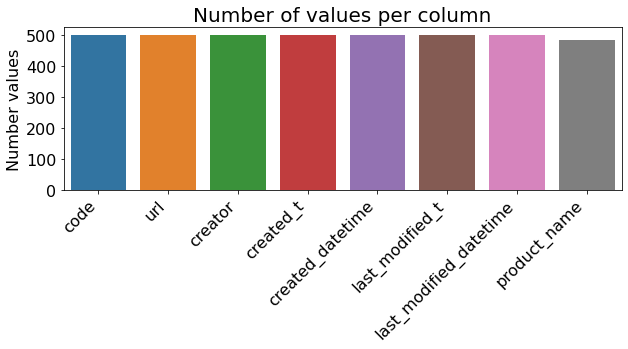

In [22]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=general_infos.columns, y=general_infos.count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

#### 3.1.4.1 Original

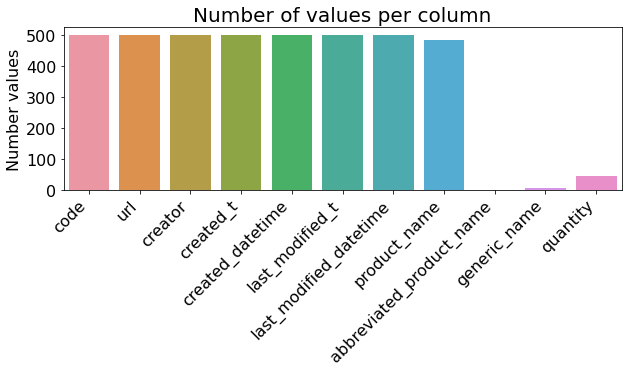

In [23]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=general_infos_features, y=data[general_infos_features].count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

***
## 3.2 Tags group

### 3.2.1 Overview

In [24]:
tags_features = data.loc[:, "packaging":"countries_en"].columns
tags_features

Index(['packaging', 'packaging_tags', 'packaging_text', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_en',
       'origins', 'origins_tags', 'origins_en', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities',
       'cities_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_en'],
      dtype='object')

In [25]:
tags = data.loc[:, tags_features]

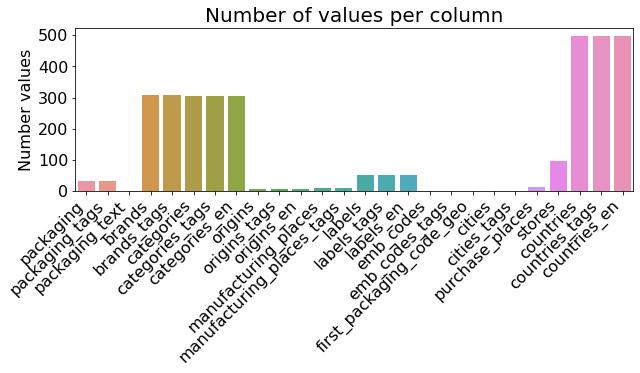

In [26]:
dataframe_distribution_overview(tags)

In [27]:
tags.head()

,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,...,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en
4211,NaN,NaN,NaN,NaN,NaN,"Snacks, Sweet snacks, Confectioneries, Chocola...","en:snacks,en:sweet-snacks,en:cocoa-and-its-pro...","Snacks,Sweet snacks,Cocoa and its products,Con...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,en:united-states,United States
2431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:us,en:united-states,United States
3558,NaN,NaN,NaN,Butternut Mountain Farm,butternut-mountain-farm,"Groceries, Sauces","en:groceries,en:sauces","Groceries,Sauces",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,en:united-states,United States
307,NaN,NaN,NaN,Lundberg,lundberg,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,en:united-states,United States
9544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:United States,en:united-states,United States


In [28]:
tags.iloc[:, :13].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 4211 to 3806
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   packaging                  32 non-null     object
 1   packaging_tags             32 non-null     object
 2   packaging_text             0 non-null      object
 3   brands                     308 non-null    object
 4   brands_tags                308 non-null    object
 5   categories                 304 non-null    object
 6   categories_tags            304 non-null    object
 7   categories_en              304 non-null    object
 8   origins                    6 non-null      object
 9   origins_tags               6 non-null      object
 10  origins_en                 6 non-null      object
 11  manufacturing_places       9 non-null      object
 12  manufacturing_places_tags  9 non-null      object
dtypes: object(13)
memory usage: 54.7+ KB


In [29]:
tags.iloc[:, 13:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 4211 to 3806
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   labels                    52 non-null     object 
 1   labels_tags               52 non-null     object 
 2   labels_en                 52 non-null     object 
 3   emb_codes                 2 non-null      object 
 4   emb_codes_tags            2 non-null      object 
 5   first_packaging_code_geo  2 non-null      object 
 6   cities                    0 non-null      float64
 7   cities_tags               2 non-null      object 
 8   purchase_places           14 non-null     object 
 9   stores                    97 non-null     object 
 10  countries                 498 non-null    object 
 11  countries_tags            498 non-null    object 
 12  countries_en              498 non-null    object 
dtypes: float64(1), object(12)
memory usage: 54.7+ KB


***
### 3.2.2 Usability

#### 3.2.2.1 Usability: packaging_text

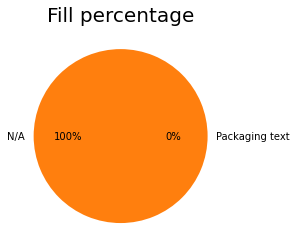

In [30]:
feature_filling(tags, "packaging_text", "Packaging text")

In [31]:
tags.drop(columns=["packaging_text"], inplace=True)

***
#### 3.2.2.2 Usability: cities

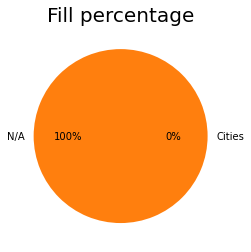

In [32]:
feature_filling(tags, "cities", "Cities")

In [33]:
tags.drop(columns=["cities"], inplace=True)

***
### 3.2.3 Redundancy

#### 3.2.3.1 Redundancy: packaging, packaging_tags

In [34]:
tags.loc[:, ["packaging", "packaging_tags"]].loc[tags.packaging.notna() & tags.packaging_tags.notna()].iloc[:20]

,packaging,packaging_tags
942,"Plastique,Doypack,Sachet,Pochon,Sachet refermable","plastique,doypack,sachet,pochon,sachet-refermable"
7621,plastic,plastic
971,bucket,bucket
3532,sachets,sachets
2921,plastic tub,plastic-tub
9439,en:card-box,en-card-box
2796,"en:hdpe-bottle, en:paper-wrapper, en:hdpe-lid","en-hdpe-bottle,en-paper-wrapper,en-hdpe-lid"
3112,"Plastic,wrap","plastic,wrap"
2453,"fr:verre,fr:bocal,Metal,Glass","fr-verre,fr-bocal,metal,glass"
8710,Canned,canned


In [35]:
tags[tags.packaging_tags.notna()].loc[:,["packaging"]].isna().sum()

packaging    0
dtype: int64

We can see that each time one of the features "packaging" or "packaging_tags" is filled, the other is also filled.
We will keep the feature "packaging" because it transport more information, plus, it's easier to get rid of the "en:", "fr:" than "en-", because in "packaging_tags" each separator is a "-" and not in "packaging".

In [36]:
tags.drop(columns=["packaging_tags"], inplace=True)

***
#### 3.2.3.2 Redundancy: brands, brands_tags

In [37]:
tags.iloc[:20].loc[:, ["brands", "brands_tags"]]

,brands,brands_tags
4211,NaN,NaN
2431,NaN,NaN
3558,Butternut Mountain Farm,butternut-mountain-farm
307,Lundberg,lundberg
9544,NaN,NaN
2948,Sorini Italia,sorini-italia
2272,Marks And Spencer,marks-and-spencer
8140,Kroger,kroger
7311,Kroger,kroger
9177,Simple Truth Organic,simple-truth-organic


In [38]:
tags[tags.brands_tags.notna()].loc[:,["brands"]].isna().sum()

brands    0
dtype: int64

The features "brands" and "brands_tags" are almost equally filled. We will keep "brands" because this feature carry most information (spaces, capital letters...)

In [39]:
tags.drop(columns=["brands_tags"], inplace=True)

***
#### 3.2.3.3 Redundancy: categories, categories_tags, categories_en

In [40]:
tags.loc[:, ["categories", "categories_tags", "categories_en"]].iloc[:20]

,categories,categories_tags,categories_en
4211,"Snacks, Sweet snacks, Confectioneries, Chocola...","en:snacks,en:sweet-snacks,en:cocoa-and-its-pro...","Snacks,Sweet snacks,Cocoa and its products,Con..."
2431,NaN,NaN,NaN
3558,"Groceries, Sauces","en:groceries,en:sauces","Groceries,Sauces"
307,NaN,NaN,NaN
9544,NaN,NaN,NaN
2948,"Snacks, Sweet snacks, Confectioneries, Chocola...","en:snacks,en:sweet-snacks,en:cocoa-and-its-pro...","Snacks,Sweet snacks,Cocoa and its products,Con..."
2272,NaN,NaN,NaN
8140,Snacks,en:snacks,Snacks
7311,"Dairies, Fermented foods, Fermented milk produ...","en:dairies,en:fermented-foods,en:fermented-mil...","Dairies,Fermented foods,Fermented milk product..."
9177,"Plant-based foods and beverages, Plant-based f...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo..."


In [41]:
tags[tags.categories.notna()].loc[:,["categories_en"]].isna().sum()

categories_en    0
dtype: int64

In [42]:
tags[tags.categories_tags.notna()].loc[:,["categories_en"]].isna().sum()

categories_en    0
dtype: int64

We will keep "categories_en".

In [43]:
tags.drop(columns=["categories", "categories_tags"], inplace=True)

***
#### 3.2.3.4 Redundancy: origins, origins_tags, origins_en

In [44]:
tags.loc[:, ["origins", "origins_tags", "origins_en"]].loc[tags.origins.notna() & tags.origins_tags.notna() & tags.origins_en.notna()].iloc[:20]

,origins,origins_tags,origins_en
942,UE,en:european-union,European Union
7621,United States,en:united-states,United States
3112,"Easter Grangemuir Farm,Pittenweem,Fife,KY10 2R...","en:united-kingdom,en:easter-grangemuir-farm,en...","United Kingdom,Easter-grangemuir-farm,Fife,Ky1..."
7300,United States,en:united-states,United States
425,Québec,fr:quebec,fr:quebec
993,Germany,en:germany,Germany


In [45]:
tags[tags.origins_tags.notna()].loc[:,["origins"]].isna().sum()

origins    0
dtype: int64

In [46]:
tags[tags.origins_en.notna()].loc[:,["origins"]].isna().sum()

origins    0
dtype: int64

We will keep the feature "origins"

In [47]:
tags.drop(columns=["origins_tags", "origins_en"], inplace=True)

***
#### 3.2.3.5 Redundancy: manufacturing_places, manufacturing_places_tags

In [48]:
tags.loc[:, ["manufacturing_places", "manufacturing_places_tags"]].loc[tags.manufacturing_places.notna() & tags.manufacturing_places_tags.notna()].iloc[:20]

,manufacturing_places,manufacturing_places_tags
971,Germany,germany
2453,United Kingdom,united-kingdom
1983,France,france
2841,Thailand,thailand
3548,Belgique,belgique
7300,United States,united-states
5189,The Hershey Company,the-hershey-company
425,"Brossard,Québec","brossard,quebec"
993,Germany,germany


We will keep the feature "manufacturing_places"

In [49]:
tags.drop(columns=["manufacturing_places_tags"], inplace=True)

***
#### 3.2.3.6 labels, labels_tags, labels_en

In [50]:
tags.loc[:, ["labels", "labels_tags", "labels_en"]].loc[tags.labels.notna() & tags.labels_en.notna() & tags.labels_en.notna()].iloc[:20]

,labels,labels_tags,labels_en
307,Organic,en:organic,Organic
942,"Végétarien, en:gluten-free, Sans OGM, Riche en...","en:vegetarian,en:no-gluten,en:high-proteins,en...","Vegetarian,No gluten,High proteins,No GMOs,Sup..."
3659,"Nutriscore, Nutriscore A","en:nutriscore,en:nutriscore-grade-a","Nutriscore,Nutriscore Grade A"
5400,Organic,en:organic,Organic
971,"Vegetarisch, Vegan","en:vegetarian,en:vegan","Vegetarian,Vegan"
827,Sans colorants,en:no-colorings,No colorings
3532,Isoxan sport,fr:isoxan-sport,fr:isoxan-sport
3596,Gluten-free,en:no-gluten,No gluten
3560,Organic,en:organic,Organic
1325,en:gluten-free,en:no-gluten,No gluten


We will keep "labels_en"

In [51]:
tags.drop(columns=["labels", "labels_tags"], inplace=True)

***
#### 3.2.3.7 emb_codes, emb_codes_tags

In [52]:
tags.loc[:, ["emb_codes", "emb_codes_tags"]].loc[tags.emb_codes.notna() & tags.emb_codes_tags.notna()].iloc[:20]

,emb_codes,emb_codes_tags
2066,FR 62.160.205 EC,fr-62-160-205-ec
1541,FR 81.124.058 EC,fr-81-124-058-ec


We will keep "emb_codes".

In [53]:
tags.drop(columns=["emb_codes_tags"], inplace=True)

***
#### 3.2.3.8 countries, countries_tags, countries_en

In [54]:
tags.iloc[:20,:].loc[:,["countries", "countries_tags", "countries_en"]]

,countries,countries_tags,countries_en
4211,United States,en:united-states,United States
2431,en:us,en:united-states,United States
3558,United States,en:united-states,United States
307,United States,en:united-states,United States
9544,en:United States,en:united-states,United States
2948,United States,en:united-states,United States
2272,France,en:france,France
8140,United States,en:united-states,United States
7311,United States,en:united-states,United States
9177,United States,en:united-states,United States


In [55]:
fill_infos(tags, "countries_en")

countries_en total rows:  498
countries_en filled count:  496
countries_en filled percentage:  2.49


In [56]:
tags.drop(columns=["countries", "countries_tags"], inplace=True)

***
### 3.2.4 Conclusion

In [57]:
tags.describe()

,packaging,brands,categories_en,origins,manufacturing_places,labels_en,emb_codes,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_en
count,32,308,304,6,9,52,2,2,2,14,97,498
unique,31,144,131,5,8,29,2,2,2,9,11,16
top,plastic,Kroger,"Snacks,Sweet snacks,Cocoa and its products,Con...",United States,Germany,Organic,FR 62.160.205 EC,"43.716667,2.7",boulogne-sur-mer-pas-de-calais-france,France,Kroger,United States
freq,2,80,19,2,2,14,1,1,1,3,77,354


In [58]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 4211 to 3806
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   packaging                 32 non-null     object
 1   brands                    308 non-null    object
 2   categories_en             304 non-null    object
 3   origins                   6 non-null      object
 4   manufacturing_places      9 non-null      object
 5   labels_en                 52 non-null     object
 6   emb_codes                 2 non-null      object
 7   first_packaging_code_geo  2 non-null      object
 8   cities_tags               2 non-null      object
 9   purchase_places           14 non-null     object
 10  stores                    97 non-null     object
 11  countries_en              498 non-null    object
dtypes: object(12)
memory usage: 50.8+ KB


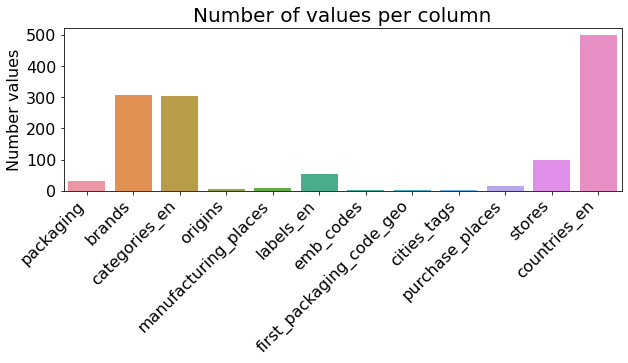

In [59]:
dataframe_distribution_overview(tags)

#### 3.2.4.1 Original

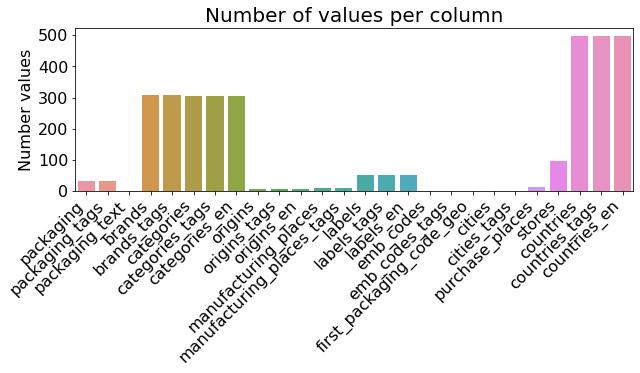

In [60]:
dataframe_distribution_overview(data[tags_features])

***
## 3.3 Ingredients group

### 3.3.1 Overview

In [61]:
ingredients_features = data.loc[:, "ingredients_text":"traces_tags"].columns
ingredients_features

Index(['ingredients_text', 'allergens', 'allergens_en', 'traces',
       'traces_tags'],
      dtype='object')

In [62]:
ingredients = data.loc[:, ingredients_features]

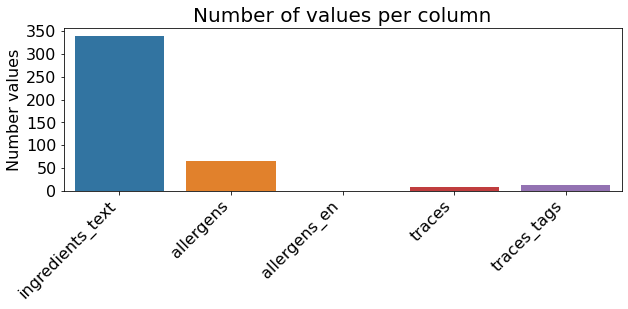

In [63]:
dataframe_distribution_overview(ingredients)

In [64]:
ingredients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 4211 to 3806
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ingredients_text  339 non-null    object 
 1   allergens         66 non-null     object 
 2   allergens_en      0 non-null      float64
 3   traces            8 non-null      object 
 4   traces_tags       14 non-null     object 
dtypes: float64(1), object(4)
memory usage: 23.4+ KB


In [65]:
ingredients.head()

,ingredients_text,allergens,allergens_en,traces,traces_tags
4211,"White chocolate [sugar, cocoa butter, milk, sk...",en:milk,NaN,NaN,NaN
2431,NaN,NaN,NaN,NaN,NaN
3558,"Vinegar, light brown sugar, corn syrup, tomato...",NaN,NaN,NaN,NaN
307,Organic white basmati rice,NaN,NaN,NaN,NaN
9544,"chicken breast meat with rib meat, wheat flour...",NaN,NaN,NaN,NaN


***
### 3.3.2 Usability

#### 3.3.2.1 Usability: allergens_en

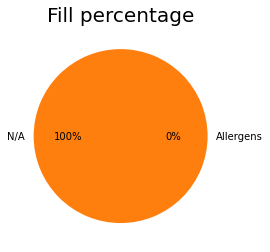

In [66]:
feature_filling(ingredients, "allergens_en", "Allergens")

In [67]:
ingredients.drop(columns=["allergens_en"], inplace=True)

***
### 3.3.3 Redundancy

#### 3.3.3.1 Redundancy: traces, traces_tags

In [68]:
ingredients.loc[:, ["traces", "traces_tags"]].loc[ingredients.traces.notna() & ingredients.traces_tags.notna()].iloc[:20]

,traces,traces_tags
971,"en:gluten,en:milk,en:nuts","en:gluten,en:milk,en:nuts"
1983,"en:nuts,en:soybeans","en:nuts,en:soybeans"
3666,"en:nuts,en:peanuts","en:nuts,en:peanuts"
3548,"en:gluten,en:milk,en:nuts,en:peanuts","en:gluten,en:milk,en:nuts,en:peanuts"
2213,en:Milk derivatives,en:milk-derivatives
993,"en:gluten,en:milk,en:nuts","en:gluten,en:milk,en:nuts"
6990,"en:gluten,en:milk","en:gluten,en:milk"
430,"en:celery,en:crustaceans,en:eggs,en:fish,en:gl...","en:celery,en:crustaceans,en:eggs,en:fish,en:gl..."


There is, at first sight, no better feature. We will keep "traces"

In [69]:
ingredients.drop(columns=["traces_tags"], inplace=True)

***
### 3.3.4 Conclusion

In [70]:
ingredients.describe()

,ingredients_text,allergens,traces
count,339,66,8
unique,335,20,7
top,"Cucumbers, water, vinegar, salt, calcium chlor...",en:milk,"en:gluten,en:milk,en:nuts"
freq,2,15,2


In [71]:
ingredients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 4211 to 3806
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ingredients_text  339 non-null    object
 1   allergens         66 non-null     object
 2   traces            8 non-null      object
dtypes: object(3)
memory usage: 15.6+ KB


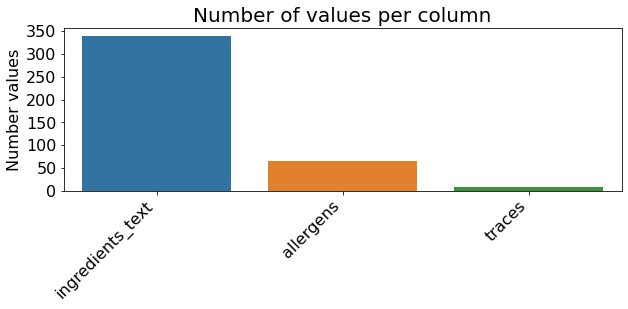

In [72]:
dataframe_distribution_overview(ingredients)

#### 3.3.4.1 Original

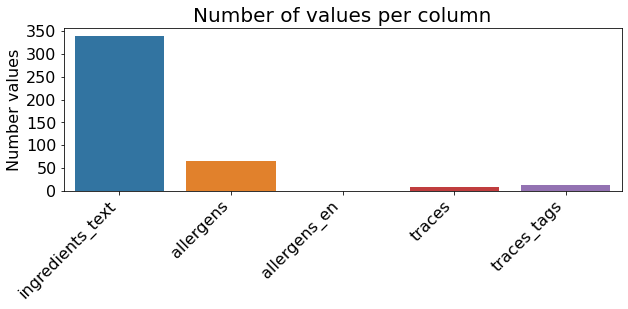

In [73]:
dataframe_distribution_overview(data[ingredients_features])

***
## 3.4 Misc datas group

#### 3.4.1 Overview

In [74]:
misc_features = data.loc[:,"serving_size":"image_nutrition_small_url"].columns
misc_features

Index(['serving_size', 'serving_quantity', 'no_nutriments', 'additives_n',
       'additives', 'additives_tags', 'additives_en',
       'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil',
       'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil',
       'ingredients_that_may_be_from_palm_oil_tags', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'states', 'states_tags', 'states_en', 'brand_owner',
       'ecoscore_score_fr', 'ecoscore_grade_fr', 'main_category',
       'main_category_en', 'image_url', 'image_small_url',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrition_url', 'image_nutrition_small_url'],
      dtype='object')

In [75]:
misc = data.loc[:, misc_features]

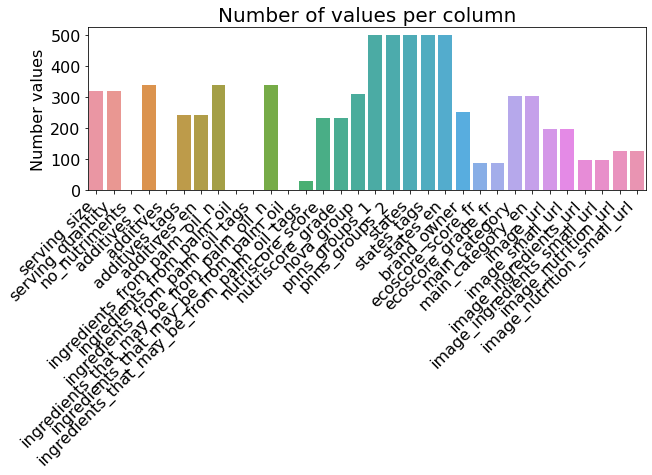

In [76]:
dataframe_distribution_overview(misc)

In [77]:
misc.iloc[:, :16].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 4211 to 3806
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   serving_size                                321 non-null    object 
 1   serving_quantity                            321 non-null    float64
 2   no_nutriments                               0 non-null      float64
 3   additives_n                                 339 non-null    float64
 4   additives                                   0 non-null      float64
 5   additives_tags                              243 non-null    object 
 6   additives_en                                243 non-null    object 
 7   ingredients_from_palm_oil_n                 339 non-null    float64
 8   ingredients_from_palm_oil                   0 non-null      float64
 9   ingredients_from_palm_oil_tags              1 non-null      object 
 10  ingredient

In [78]:
misc.iloc[:, 16:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 4211 to 3806
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pnns_groups_1                500 non-null    object 
 1   pnns_groups_2                500 non-null    object 
 2   states                       500 non-null    object 
 3   states_tags                  500 non-null    object 
 4   states_en                    500 non-null    object 
 5   brand_owner                  252 non-null    object 
 6   ecoscore_score_fr            87 non-null     float64
 7   ecoscore_grade_fr            87 non-null     object 
 8   main_category                304 non-null    object 
 9   main_category_en             304 non-null    object 
 10  image_url                    197 non-null    object 
 11  image_small_url              197 non-null    object 
 12  image_ingredients_url        98 non-null     object 
 13  image_ingredient

In [79]:
misc.head(1)

,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,...,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url
4211,3 BALLS (36 g),36.0,NaN,1.0,NaN,"en:e322,en:e322i","E322 - Lecithins,E322i - Lecithin",0.0,NaN,NaN,...,NaN,NaN,en:chocolate-candies,Chocolate candies,NaN,NaN,NaN,NaN,NaN,NaN


***
### 3.4.2 Usability

These features are competely empty and then will be no needed:
- no_nutriments
- additives
- ingredients_from_palm_oil
- ingredients_that_may_be_from_palm_oil

These features are almost empty, we will get rid of them too:
- ingredients_from_palm_oil_tags
- ingredients_that_may_be_from_palm_oil_tags

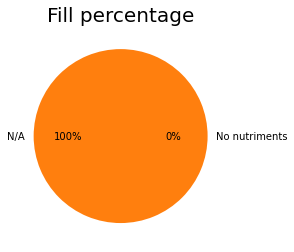

In [80]:
feature_filling(misc, "no_nutriments", "No nutriments")

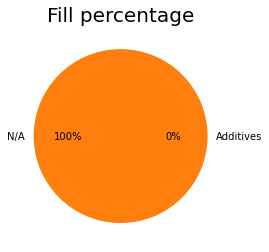

In [81]:
feature_filling(misc, "additives", "Additives")

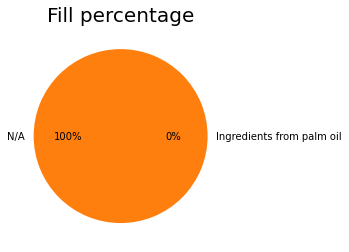

In [82]:
feature_filling(misc, "ingredients_from_palm_oil", "Ingredients from palm oil")

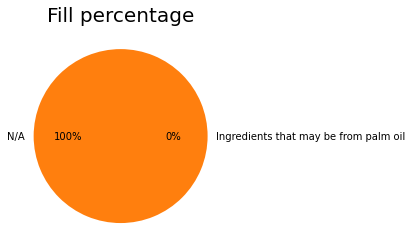

In [83]:
feature_filling(misc, "ingredients_that_may_be_from_palm_oil", "Ingredients that may be from palm oil")

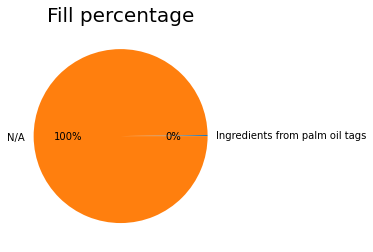

In [84]:
feature_filling(misc, "ingredients_from_palm_oil_tags", "Ingredients from palm oil tags")

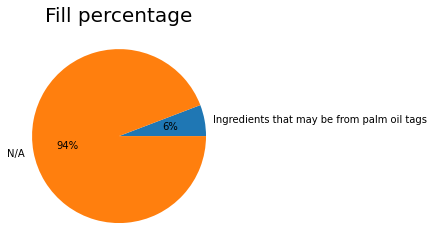

In [85]:
feature_filling(misc, "ingredients_that_may_be_from_palm_oil_tags", "Ingredients that may be from palm oil tags")

In [86]:
misc.drop(columns=["no_nutriments", "additives", "ingredients_from_palm_oil", "ingredients_that_may_be_from_palm_oil", "ingredients_from_palm_oil_tags", "ingredients_that_may_be_from_palm_oil_tags"], inplace=True)

***
### 3.4.3 Redundancy

#### 3.4.3.1 Redundancy: serving_siez, serving_quantity

In [87]:
misc.loc[:, ["serving_size", "serving_quantity"]].iloc[:20]

,serving_size,serving_quantity
4211,3 BALLS (36 g),36.0
2431,NaN,NaN
3558,2 Tbsp (35 g),35.0
307,50 g (0.25 cup),50.0
9544,NaN,NaN
2948,3 ASSORTED PIECES (40 g),40.0
2272,NaN,NaN
8140,0.25 cup (28 g),28.0
7311,0.5 cup (113 g),113.0
9177,1 Tbsp (18 g),18.0


It appears that the feature "serving_size" is non homogeneous in term of units. The feature "serving_quantity" on the other hand, seems to be only in the same unit (g).
We will keep "serving_quantity"

In [88]:
misc.drop(columns=["serving_size"], inplace=True)

***
#### 3.4.3.2 Redundancy: additives_tags, additives_en

In [89]:
misc.loc[:, ["additives_n", "additives_tags", "additives_en"]].iloc[:10]

,additives_n,additives_tags,additives_en
4211,1.0,"en:e322,en:e322i","E322 - Lecithins,E322i - Lecithin"
2431,NaN,NaN,NaN
3558,1.0,en:e150c,E150c - Ammonia caramel
307,0.0,NaN,NaN
9544,2.0,"en:e150c,en:e450,en:e450i","E150c - Ammonia caramel,E450 - Diphosphates,E4..."
2948,1.0,"en:e322,en:e322i","E322 - Lecithins,E322i - Lecithin"
2272,3.0,"en:e322,en:e322i,en:e450,en:e500,en:e500ii","E322 - Lecithins,E322i - Lecithin,E450 - Dipho..."
8140,1.0,en:e150c,E150c - Ammonia caramel
7311,5.0,"en:e200,en:e330,en:e407,en:e410,en:e412","E200 - Sorbic acid,E330 - Citric acid,E407 - C..."
9177,2.0,"en:e330,en:e440","E330 - Citric acid,E440 - Pectins"


The feature "additives_en" contains more informations and seems to be easier to parse compare to "additives_tags". Regarding "additives_n" it's the number of additives, there is no direct redundancy for that feature, we can keep it.
We will keep "additives_en" and "additives_n".

In [90]:
misc.drop(columns=["additives_tags"], inplace=True)

***
#### 3.4.3.3 Redundancy: nutriscore_score, nutriscore_grade

In [91]:
misc.loc[:, ["nutriscore_score", "nutriscore_grade"]].loc[misc.nutriscore_score.notna() & misc.nutriscore_grade.notna()].iloc[:20]

,nutriscore_score,nutriscore_grade
4211,25.0,e
2948,24.0,e
8140,16.0,d
7311,1.0,b
9177,11.0,d
8588,1.0,b
6273,1.0,b
942,11.0,d
7218,23.0,e
7893,15.0,d


We will keep both fields as one is quantitative and other is qualitative.

***
#### 3.4.3.4 Redundancy: pnns_groups_1, pnns_groups_2

In [92]:
misc.loc[:, ["pnns_groups_1", "pnns_groups_2"]].loc[misc.pnns_groups_1.notna()].iloc[:20]

,pnns_groups_1,pnns_groups_2
4211,Sugary snacks,Sweets
2431,unknown,unknown
3558,Fat and sauces,Dressings and sauces
307,unknown,unknown
9544,unknown,unknown
2948,Sugary snacks,Chocolate products
2272,unknown,unknown
8140,unknown,unknown
7311,Milk and dairy products,Cheese
9177,Sugary snacks,Sweets


Both features don't contains same value, we will keep them.

***
#### 3.4.3.5 Redundancy: states, states_tags, states_en

In [93]:
misc.loc[:, ["states", "states_tags", "states_en"]].iloc[:10]

,states,states_tags,states_en
4211,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
2431,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
3558,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
307,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
9544,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
2948,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
2272,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
8140,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
7311,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
9177,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."


Seems to be all useless. Let's see how many rows doesn't contains 'to-be-completed' or 'To be completed' in those features.

In [94]:
misc.loc[~misc.states.str.contains("to-be-completed")].states.count()

0

In [95]:
misc.loc[~misc.states_tags.str.contains("to-be-completed")].states_tags.count()

0

In [96]:
misc.loc[~misc.states_en.str.contains("To be completed")].states_en.count()

11

These features contains no usefull informations, we will get rid of them.

In [97]:
misc.drop(columns=["states", "states_tags", "states_en"], inplace=True)

***
#### 3.4.3.6 Redundancy: ecoscore_score_fr, ecoscore_grade_fr

In [98]:
misc.loc[:, ["ecoscore_score_fr", "ecoscore_grade_fr"]].loc[misc.ecoscore_score_fr.notna() & misc.ecoscore_grade_fr.notna()].iloc[:20]

,ecoscore_score_fr,ecoscore_grade_fr
7311,34.0,d
1310,62.0,b
2030,62.0,b
3659,78.0,b
5739,38.0,d
7121,34.0,d
7204,72.0,b
5734,38.0,d
1317,62.0,b
5819,38.0,d


As the nutriscore, both ecoscore are usefull, we will keep both.

***
#### 3.4.3.7 Redundancy: main_category, main_category_en

In [99]:
misc.loc[:, ["main_category", "main_category_en"]].iloc[:20]

,main_category,main_category_en
4211,en:chocolate-candies,Chocolate candies
2431,NaN,NaN
3558,en:sauces,Sauces
307,NaN,NaN
9544,NaN,NaN
2948,en:assorted-chocolates,Assorted chocolates
2272,NaN,NaN
8140,en:snacks,Snacks
7311,en:cheeses,Cheeses
9177,en:fruit-and-vegetable-preserves,Fruit and vegetable preserves


We will keep "main_category_en"

In [100]:
misc.drop(columns=["main_category"], inplace=True)

***
### 3.4.4 Conclusion

In [101]:
misc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 4211 to 3806
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   serving_quantity                         321 non-null    float64
 1   additives_n                              339 non-null    float64
 2   additives_en                             243 non-null    object 
 3   ingredients_from_palm_oil_n              339 non-null    float64
 4   ingredients_that_may_be_from_palm_oil_n  339 non-null    float64
 5   nutriscore_score                         232 non-null    float64
 6   nutriscore_grade                         232 non-null    object 
 7   nova_group                               311 non-null    float64
 8   pnns_groups_1                            500 non-null    object 
 9   pnns_groups_2                            500 non-null    object 
 10  brand_owner                              252 n

In [102]:
misc.describe()

,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,ecoscore_score_fr
count,321.000000,339.000000,339.000000,339.000000,232.000000,311.000000,87.000000
mean,68.462574,3.082596,0.002950,0.088496,11.306034,3.672026,44.160920
std,75.217768,3.925221,0.054313,0.294652,9.788073,0.808317,21.953902
min,0.000000,0.000000,0.000000,0.000000,-8.000000,1.000000,1.000000
25%,28.000000,0.000000,0.000000,0.000000,2.000000,4.000000,32.000000
50%,39.000000,2.000000,0.000000,0.000000,12.000000,4.000000,38.000000
75%,85.000000,4.000000,0.000000,0.000000,20.000000,4.000000,62.000000
max,473.000000,24.000000,1.000000,2.000000,30.000000,4.000000,88.000000


In [103]:
misc.loc[:, :"main_category_en"].describe(include=[object])

,additives_en,nutriscore_grade,pnns_groups_1,pnns_groups_2,brand_owner,ecoscore_grade_fr,main_category_en
count,243,232,500,500,252,87,304
unique,181,5,11,33,44,5,125
top,"E322 - Lecithins,E322i - Lecithin",e,unknown,unknown,The Kroger Co.,d,Chocolate candies
freq,22,69,267,267,151,37,19


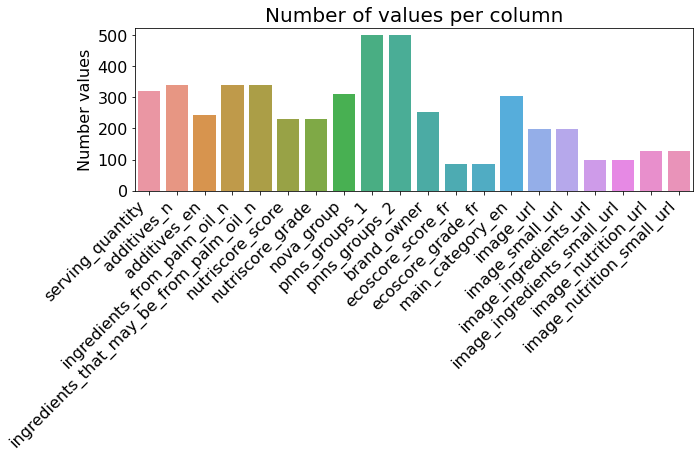

In [104]:
dataframe_distribution_overview(misc)

#### 3.4.4.1 Original

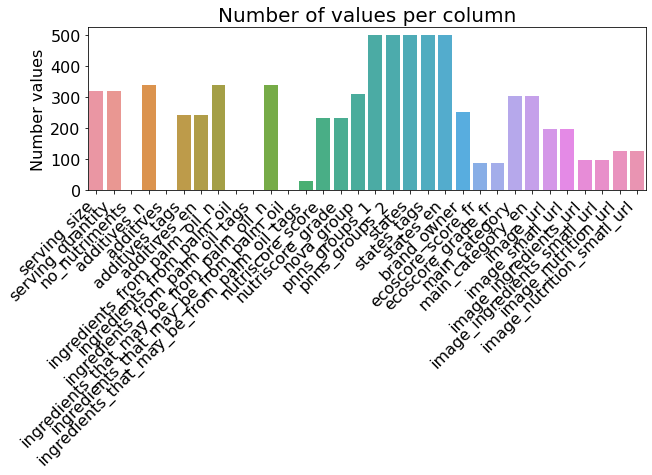

In [105]:
dataframe_distribution_overview(data[misc_features])

***
## 3.5 Nutrition facts group

### 3.5.1 Overview

In [106]:
nutr_features = data.loc[:, "energy-kj_100g":"carnitine_100g"].columns
nutr_features

Index(['energy-kj_100g', 'energy-kcal_100g', 'energy_100g',
       'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g',
       '-butyric-acid_100g', '-caproic-acid_100g', '-caprylic-acid_100g',
       '-capric-acid_100g',
       ...
       'carbon-footprint-from-meat-or-fish_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g',
       'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g',
       'inositol_100g', 'carnitine_100g'],
      dtype='object', length=111)

In [107]:
nutr = data.loc[:, nutr_features]

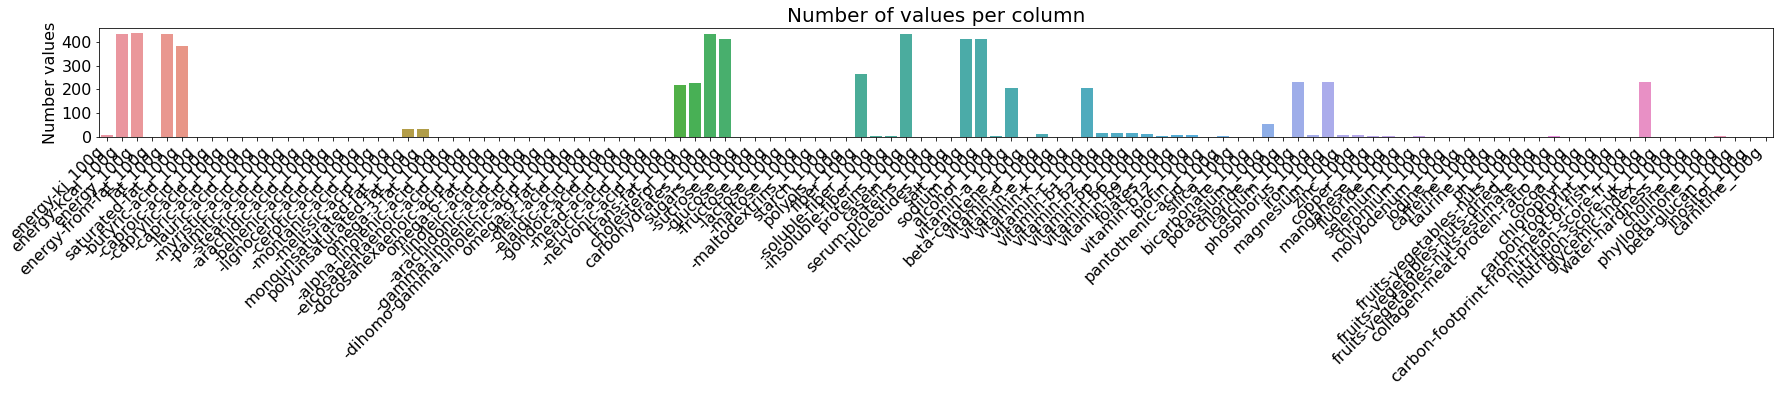

In [108]:
dataframe_distribution_overview(nutr, figsize=(30, 2))

In [109]:
nutr.iloc[:, :10].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 4211 to 3806
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   energy-kj_100g        6 non-null      float64
 1   energy-kcal_100g      433 non-null    float64
 2   energy_100g           436 non-null    float64
 3   energy-from-fat_100g  1 non-null      float64
 4   fat_100g              432 non-null    float64
 5   saturated-fat_100g    382 non-null    float64
 6   -butyric-acid_100g    0 non-null      float64
 7   -caproic-acid_100g    0 non-null      float64
 8   -caprylic-acid_100g   0 non-null      float64
 9   -capric-acid_100g     0 non-null      float64
dtypes: float64(10)
memory usage: 43.0 KB


In [110]:
nutr.iloc[:, 10:20].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 4211 to 3806
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   -lauric-acid_100g      0 non-null      float64
 1   -myristic-acid_100g    0 non-null      float64
 2   -palmitic-acid_100g    0 non-null      float64
 3   -stearic-acid_100g     0 non-null      float64
 4   -arachidic-acid_100g   0 non-null      float64
 5   -behenic-acid_100g     0 non-null      float64
 6   -lignoceric-acid_100g  0 non-null      float64
 7   -cerotic-acid_100g     0 non-null      float64
 8   -montanic-acid_100g    0 non-null      float64
 9   -melissic-acid_100g    0 non-null      float64
dtypes: float64(10)
memory usage: 43.0 KB


In [111]:
nutr.iloc[:, 20:30].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 4211 to 3806
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   monounsaturated-fat_100g     33 non-null     float64
 1   polyunsaturated-fat_100g     33 non-null     float64
 2   omega-3-fat_100g             0 non-null      float64
 3   -alpha-linolenic-acid_100g   0 non-null      float64
 4   -eicosapentaenoic-acid_100g  0 non-null      float64
 5   -docosahexaenoic-acid_100g   0 non-null      float64
 6   omega-6-fat_100g             0 non-null      float64
 7   -linoleic-acid_100g          0 non-null      float64
 8   -arachidonic-acid_100g       0 non-null      float64
 9   -gamma-linolenic-acid_100g   0 non-null      float64
dtypes: float64(10)
memory usage: 43.0 KB


In [112]:
nutr.iloc[:, 30:40].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 4211 to 3806
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   -dihomo-gamma-linolenic-acid_100g  0 non-null      float64
 1   omega-9-fat_100g                   0 non-null      float64
 2   -oleic-acid_100g                   0 non-null      float64
 3   -elaidic-acid_100g                 0 non-null      float64
 4   -gondoic-acid_100g                 0 non-null      float64
 5   -mead-acid_100g                    0 non-null      float64
 6   -erucic-acid_100g                  0 non-null      float64
 7   -nervonic-acid_100g                0 non-null      float64
 8   trans-fat_100g                     220 non-null    float64
 9   cholesterol_100g                   227 non-null    float64
dtypes: float64(10)
memory usage: 43.0 KB


In [113]:
nutr.iloc[:, 40:50].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 4211 to 3806
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   carbohydrates_100g   434 non-null    float64
 1   sugars_100g          414 non-null    float64
 2   -sucrose_100g        0 non-null      float64
 3   -glucose_100g        0 non-null      float64
 4   -fructose_100g       0 non-null      float64
 5   -lactose_100g        0 non-null      float64
 6   -maltose_100g        0 non-null      float64
 7   -maltodextrins_100g  0 non-null      float64
 8   starch_100g          1 non-null      float64
 9   polyols_100g         1 non-null      float64
dtypes: float64(10)
memory usage: 43.0 KB


In [114]:
nutr.iloc[:, 50:60].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 4211 to 3806
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fiber_100g             264 non-null    float64
 1   -soluble-fiber_100g    4 non-null      float64
 2   -insoluble-fiber_100g  3 non-null      float64
 3   proteins_100g          435 non-null    float64
 4   casein_100g            0 non-null      float64
 5   serum-proteins_100g    0 non-null      float64
 6   nucleotides_100g       0 non-null      float64
 7   salt_100g              413 non-null    float64
 8   sodium_100g            413 non-null    float64
 9   alcohol_100g           3 non-null      float64
dtypes: float64(10)
memory usage: 43.0 KB


In [115]:
nutr.iloc[:, 60:70].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 4211 to 3806
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   vitamin-a_100g      205 non-null    float64
 1   beta-carotene_100g  0 non-null      float64
 2   vitamin-d_100g      12 non-null     float64
 3   vitamin-e_100g      0 non-null      float64
 4   vitamin-k_100g      0 non-null      float64
 5   vitamin-c_100g      206 non-null    float64
 6   vitamin-b1_100g     16 non-null     float64
 7   vitamin-b2_100g     17 non-null     float64
 8   vitamin-pp_100g     16 non-null     float64
 9   vitamin-b6_100g     12 non-null     float64
dtypes: float64(10)
memory usage: 43.0 KB


In [116]:
nutr.iloc[:, 70:80].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 4211 to 3806
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   vitamin-b9_100g        3 non-null      float64
 1   folates_100g           10 non-null     float64
 2   vitamin-b12_100g       9 non-null      float64
 3   biotin_100g            1 non-null      float64
 4   pantothenic-acid_100g  5 non-null      float64
 5   silica_100g            0 non-null      float64
 6   bicarbonate_100g       0 non-null      float64
 7   potassium_100g         53 non-null     float64
 8   chloride_100g          0 non-null      float64
 9   calcium_100g           232 non-null    float64
dtypes: float64(10)
memory usage: 43.0 KB


In [117]:
nutr.iloc[:, 80:90].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 4211 to 3806
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   phosphorus_100g  9 non-null      float64
 1   iron_100g        232 non-null    float64
 2   magnesium_100g   9 non-null      float64
 3   zinc_100g        7 non-null      float64
 4   copper_100g      4 non-null      float64
 5   manganese_100g   3 non-null      float64
 6   fluoride_100g    0 non-null      float64
 7   selenium_100g    2 non-null      float64
 8   chromium_100g    1 non-null      float64
 9   molybdenum_100g  1 non-null      float64
dtypes: float64(10)
memory usage: 43.0 KB


In [118]:
nutr.iloc[:, 90:100].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 4211 to 3806
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   iodine_100g                           1 non-null      float64
 1   caffeine_100g                         0 non-null      float64
 2   taurine_100g                          0 non-null      float64
 3   ph_100g                               0 non-null      float64
 4   fruits-vegetables-nuts_100g           0 non-null      float64
 5   fruits-vegetables-nuts-dried_100g     0 non-null      float64
 6   fruits-vegetables-nuts-estimate_100g  2 non-null      float64
 7   collagen-meat-protein-ratio_100g      0 non-null      float64
 8   cocoa_100g                            0 non-null      float64
 9   chlorophyl_100g                       0 non-null      float64
dtypes: float64(10)
memory usage: 43.0 KB


In [119]:
nutr.iloc[:, 100:110].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 4211 to 3806
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   carbon-footprint_100g                    0 non-null      float64
 1   carbon-footprint-from-meat-or-fish_100g  1 non-null      float64
 2   nutrition-score-fr_100g                  232 non-null    float64
 3   nutrition-score-uk_100g                  0 non-null      float64
 4   glycemic-index_100g                      0 non-null      float64
 5   water-hardness_100g                      0 non-null      float64
 6   choline_100g                             0 non-null      float64
 7   phylloquinone_100g                       2 non-null      float64
 8   beta-glucan_100g                         0 non-null      float64
 9   inositol_100g                            0 non-null      float64
dtypes: float64(10)
memory usage: 43.0 KB


In [120]:
nutr.iloc[:, 110:120].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 4211 to 3806
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carnitine_100g  0 non-null      float64
dtypes: float64(1)
memory usage: 7.8 KB


***
### 3.5.2 Usability

All features that have less than 1% fill percentage will be dropped.

In [121]:
index_lesser_than_percentage = index_lth(pd, np, nutr, 5)
index_lesser_than_percentage

Index(['energy-kj_100g', 'energy-from-fat_100g', '-butyric-acid_100g',
       '-caproic-acid_100g', '-caprylic-acid_100g', '-capric-acid_100g',
       '-lauric-acid_100g', '-myristic-acid_100g', '-palmitic-acid_100g',
       '-stearic-acid_100g', '-arachidic-acid_100g', '-behenic-acid_100g',
       '-lignoceric-acid_100g', '-cerotic-acid_100g', '-montanic-acid_100g',
       '-melissic-acid_100g', 'omega-3-fat_100g', '-alpha-linolenic-acid_100g',
       '-eicosapentaenoic-acid_100g', '-docosahexaenoic-acid_100g',
       'omega-6-fat_100g', '-linoleic-acid_100g', '-arachidonic-acid_100g',
       '-gamma-linolenic-acid_100g', '-dihomo-gamma-linolenic-acid_100g',
       'omega-9-fat_100g', '-oleic-acid_100g', '-elaidic-acid_100g',
       '-gondoic-acid_100g', '-mead-acid_100g', '-erucic-acid_100g',
       '-nervonic-acid_100g', '-sucrose_100g', '-glucose_100g',
       '-fructose_100g', '-lactose_100g', '-maltose_100g',
       '-maltodextrins_100g', 'starch_100g', 'polyols_100g',
       '-s

In [122]:
nutr.drop(columns=index_lesser_than_percentage, inplace=True)

***
### 3.5.3 Redundancy

#### 3.5.3.1 Redundancy: nutrition-score-fr_100g

nutrition-score-fr_100g is redundant with "nutriscore_score" and "nutriscore_grade". It will be dropped.

In [123]:
nutr.drop(columns=["nutrition-score-fr_100g"], inplace=True)

***
#### 3.5.3.2 Redundancy: energy-kj_100g, energy-kcal_100g, energy_100g

In [124]:
nutr.loc[:, ["energy-kj_100g", "energy-kcal_100g", "energy_100g"]].loc[nutr["energy-kj_100g"].notna()].iloc[:10]

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['energy-kj_100g'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

The "energy-kj_100g" is much emptier than the two other energy features and bring no additional infos.
The feature "energy-kcal_100g" has explicit unit and is the most filled.

We will keep only "energy-kcal_100g"

In [ ]:
nutr.drop(columns=["energy-kj_100g", "energy_100g"], inplace=True)

***
### 3.5.4 Conclusion

In [ ]:
nutr.info()

In [ ]:
nutr.describe()

In [ ]:
dataframe_distribution_overview(nutr)

#### 3.5.4.1 Original

In [ ]:
dataframe_distribution_overview(data[nutr_features], figsize=(30, 2))

***
## 3.6 Results

In [ ]:
features = general_infos.join([tags, ingredients, misc, nutr])

In [ ]:
features.shape

In [ ]:
dataframe_distribution_overview(features, figsize=(30, 2))

***
# 4 Saving

In [ ]:
features.shape

In [ ]:
features.to_csv("datas/sample.csv", sep=";")

***
# ? Nutriscore

## Nutriscore feature analysis

In [ ]:
nutriscore_features = [
    "fruits-vegetables-nuts_100g",
    "proteins_100g",
    "fiber_100g",
    "sugars_100g",
    "salt_100g",
    "saturated-fat_100g",
    "energy-kcal_100g"
]

In [ ]:
nutriscore_data = data.loc[:, ["nutriscore_score", "nutriscore_grade", "nutrition-score-fr_100g"]]
nutriscore_data.head(10)

In [ ]:
na = nutriscore_data.any(axis="columns")
print("at least one value: ", na.sum())
print("nutriscore_grade recorded: ", data.nutriscore_grade.notna().sum())
print("all rows: ", na.count())

We can see that these threee features "nutriscore_score", "nutriscore_grade" and "nutrition-fr_100G" are redundant. Each time there is at least one of them recorded, the two others are also filled.

We can then get ride of "nutrition-fr_100g" and keep the two others.

In [ ]:
features += ["nutriscore_score", "nutriscore_grade"]

Too few entries have nutriscore cell filled, around 33%.
Could be a way to calculate it manually from other fields ?

## Nutriscore needed data

Is there a way to calculate Nutriscore from the others information ?

For that, we need to have the P and N ingredients of the nutriscore formula.

P (positive) ingredients:
- fruits, vegetable, nuts
- proteins
- fiber

N (negative) ingredients:
- sugar
- salt
- saturated fatty acid
- energy (kcal)

In [ ]:
p = [
    "fruit",
    "vegetable",
    "nuts",
    "olive",
    "fiber"
]

In [ ]:
n = [
    "sugar",
    "sodium",
    "saturated fatr"
]

## Search for needed fields/features

In [ ]:
results = []
for ingredient in p + n:
    for column in data.columns:
        if ingredient in column:
            results.append(column)
print(len(results))
results

## Nutriscore's features content analysis

They are the fields needed for the nutriscore formulas, but:
- "fruits-vegetables-nuts_100g": completely empty
- "fiber": too fews records, but could simply be due to the fact not all product contains fiber

## Where are the fruits, vegetables and nuts ?

In [ ]:
pd.set_option('display.max_colwidth', None)

ingredient_text_data = data[data.ingredients_text.notna()].ingredients_text
ingredient_text_data.head(5)

In [ ]:
def search(row, col: str, match: list):
    for m in match:
        if m in row[col]:
            print("row[col]: ", row[col])
            # return row[col].index

data[data.ingredients_text.notna()].iloc[:10].apply(lambda row: search(row, "ingredients_text", p), axis=1)

Even if we succed to demonstrate the concentration in fruits/evetables/nuts of certain products, we still can't calculate the nutriscore because we don't have the proportion of those elements per 100g.

### Conclusion
There is now way to calculate the nutriscore.